In [1]:
import torch
print("PyTorch version:", torch.__version__)
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda if torch.cuda.is_available() else "None")

if torch.cuda.is_available():
    print("Number of CUDA devices:", torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}:", torch.cuda.get_device_name(i))
        print(f"Device capabilities: {torch.cuda.get_device_capability(i)}")
        print(f"Device properties:")
        props = torch.cuda.get_device_properties(i)
        print(f"  Name: {props.name}")
        print(f"  Total memory: {props.total_memory / 1024**3:.2f} GB")
else:
    print("No CUDA devices available")

PyTorch version: 2.5.1+cu121
Is CUDA available: True
CUDA version: 12.1
Number of CUDA devices: 1
Device 0: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Device capabilities: (8, 6)
Device properties:
  Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU
  Total memory: 4.00 GB


Find File: 'archive/events.csv'
Load Success
Data: (2756101, 5)

Head 5:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Data type:
timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object

Missed data:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

Summary:
          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12 

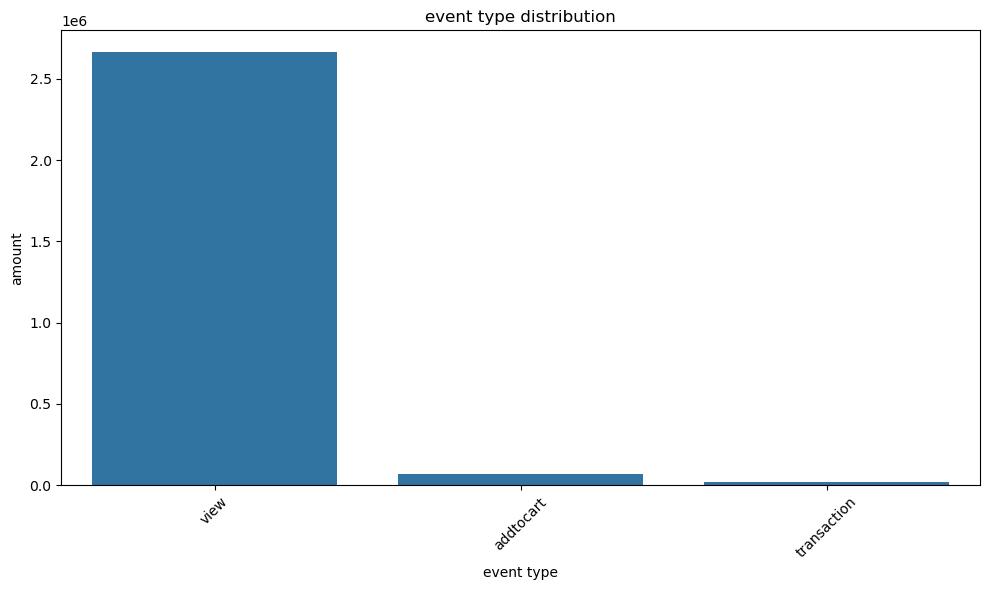

In [1]:
# 導入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# 設置隨機種子
SEED = 42
np.random.seed(SEED)

# 定義數據文件路徑
file_path = r'archive/events.csv'  

if not os.path.exists(file_path):
    print(f"Error No such file '{file_path}'")
else:
    print(f"Find File: '{file_path}'")

# 載入數據
def load_data(file_path):
    try:
        # 嘗試載入CSV文件
        df = pd.read_csv(file_path)
        print(f"Load Success")
        print(f"Data: {df.shape}")
        
        print("\nHead 5:")
        print(df.head())
        
        print("\nData type:")
        print(df.dtypes)
        
        print("\nMissed data:")
        print(df.isnull().sum())
        
        print("\nSummary:")
        print(df.describe())
        
        for column in df.columns:
            print(f"{column}: {df[column].nunique()} Unique data")
        
        return df
    
    except Exception as e:
        print(f"Cannot load file: {e}")
        return None

# 載入數據
events_df = load_data(file_path)

if events_df is not None:
    # 時間戳格式
    try:
        events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')
        print("\nTrans Success！")
        print(f"Time range: {events_df['timestamp'].min()} to {events_df['timestamp'].max()}")
    except Exception as e:
        print(f"Trans Fail: {e}")
    
    #查看事件類型分布
    print("\nEvent distribution:")
    event_counts = events_df['event'].value_counts()
    print(event_counts)
    
    # 繪製事件類型分布圖
    plt.figure(figsize=(10, 6))
    sns.countplot(x='event', data=events_df)
    plt.title('event type distribution')
    plt.xlabel('event type')
    plt.ylabel('amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('event_distribution.png')
    
    # 保存初始數據
    events_df_to_save = events_df.copy()
    if 'timestamp' in events_df.columns and pd.api.types.is_datetime64_any_dtype(events_df['timestamp']):
        events_df_to_save['original_timestamp'] = events_df['timestamp']
        events_df_to_save['timestamp'] = events_df['timestamp'].astype(np.int64) // 10**6 
    
    # 保存為CSV
    events_df_to_save.to_csv('events_processed_step1.csv', index=False)

Load Successfully Data Shape: (2756101, 6)
Used Transed time...
Duplicated: 460
After deleted Duplicate: (2755641, 5)
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
dtype: int64
'view' or 'addtocart' but itemid Missed: 0
'transaction' missed data: 0
All data can be used

Sort by time...
Time range: 2015-05-03 03:00:04.384000 to 2015-09-18 02:59:47.788000
All time range: 137 days 23:59:43.404000

Event distribution:
event
view           2664218
addtocart        68966
transaction      22457
Name: count, dtype: int64

Visiter: 1407580
Item: 235061

Weekly distribution...

Event (amount):
next_event   addtocart  transaction    view
prev_event                                 
addtocart        11247         4460   28525
transaction       1550         2288    9703
view             34451        14644  835204

Event (Percantage):
next_event   addtocart  transaction       view
prev_event                                

<Figure size 1200x600 with 0 Axes>

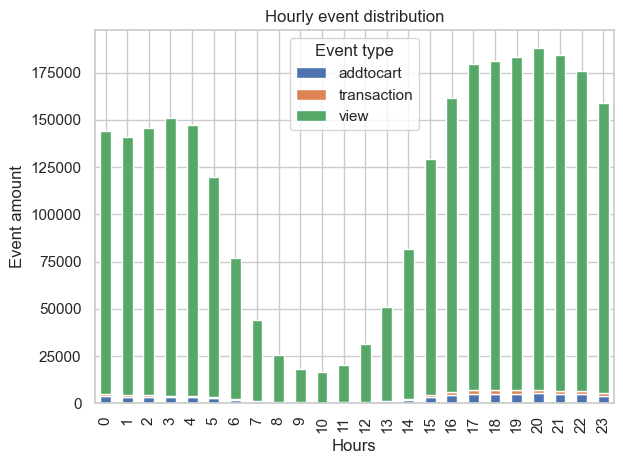

<Figure size 1200x600 with 0 Axes>

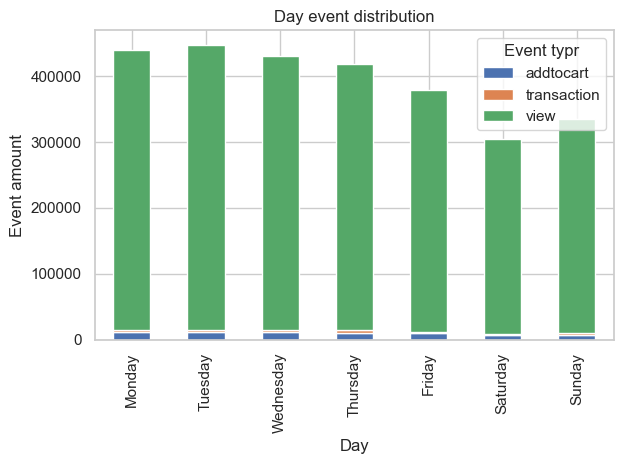

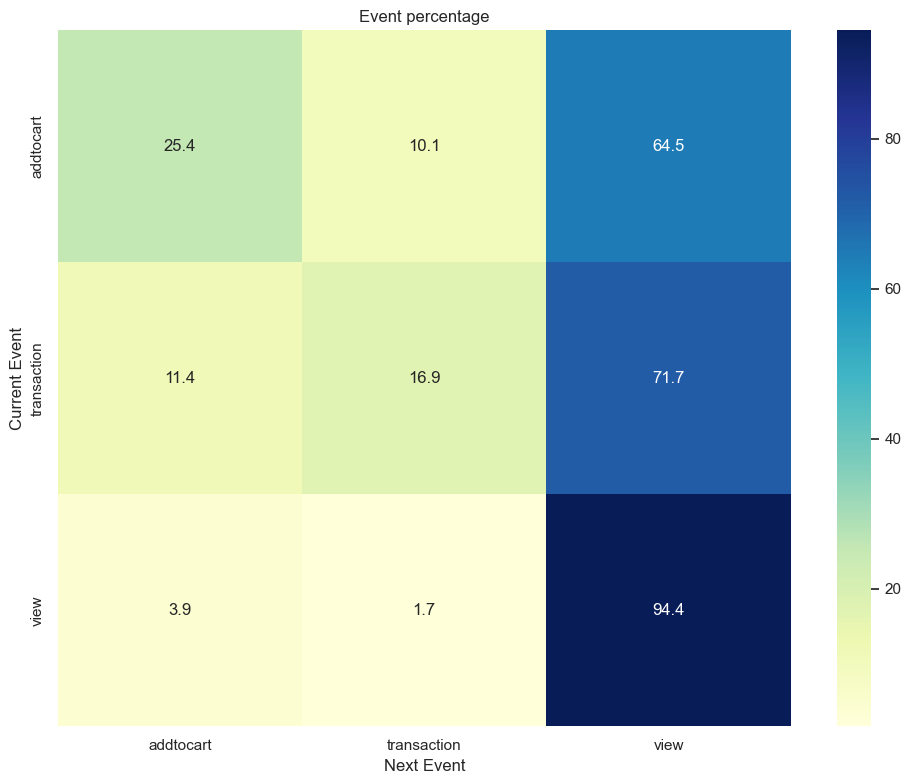

In [3]:
# 設置顯示項
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# 設置樣式
plt.style.use('ggplot')
sns.set(style="whitegrid")

# 設置隨機種子
SEED = 42
np.random.seed(SEED)

# 定義路徑
file_path = 'events_processed_step1.csv'

# 載入數據
try:
    events_df = pd.read_csv(file_path)
    print(f"Load Successfully Data Shape: {events_df.shape}")
except Exception as e:
    print(f"Load Fail: {e}")
    events_df = None

if events_df is not None:
    # 1. 數據清洗
    # 創建副本
    clean_df = events_df.copy()
    
    # 轉換時間格式
    if 'original_timestamp' in clean_df.columns:
        print("Used Transed time...")
        clean_df['timestamp'] = pd.to_datetime(clean_df['original_timestamp'])
        # 刪除冗餘
        clean_df.drop('original_timestamp', axis=1, inplace=True)
    # elif not pd.api.types.is_datetime64_any_dtype(clean_df['timestamp']):
    #     print("轉換時間戳為日期時間格式...")
    #     clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'], unit='ms')

    #檢查並處理重複行
    duplicate_count = clean_df.duplicated().sum()
    print(f"Duplicated: {duplicate_count}")
    if duplicate_count > 0:
        clean_df = clean_df.drop_duplicates()
        print(f"After deleted Duplicate: {clean_df.shape}")

    #檢查並處理缺失值
    print(clean_df.isnull().sum())

    # 對於必須存在的列（timestamp, visitorid, event）刪除缺失值
    clean_df = clean_df.dropna(subset=['timestamp', 'visitorid', 'event'])
    
    # 對於itemid列，只有在event是'view'或'addtocart'時才必須有值
    view_cart_missing = ((clean_df['event'].isin(['view', 'addtocart'])) & 
                         (clean_df['itemid'].isna())).sum()
    print(f"'view' or 'addtocart' but itemid Missed: {view_cart_missing}")

    if view_cart_missing > 0:
        clean_df = clean_df[~((clean_df['event'].isin(['view', 'addtocart'])) & 
                             (clean_df['itemid'].isna()))]
        print(f"Shape after process and deleted missed data: {clean_df.shape}")

    # 對於transactionid列，只有在event是'transaction'時才必須有值
    transaction_id_missing = ((clean_df['event'] == 'transaction') & 
                              (clean_df['transactionid'].isna())).sum()
    print(f"'transaction' missed data: {transaction_id_missing}")

    if transaction_id_missing > 0:
        clean_df = clean_df[~((clean_df['event'] == 'transaction') & 
                             (clean_df['transactionid'].isna()))]
        print(f"Shape after Process and Deleted wrong data: {clean_df.shape}")
    
    # 檢查數據一致性
    
    # 確保所有event類型
    valid_events = ['view', 'addtocart', 'transaction']
    invalid_events = clean_df[~clean_df['event'].isin(valid_events)]
    if not invalid_events.empty:
        print(f"Discover {len(invalid_events)} have wrong type")
        print(invalid_events['event'].value_counts())
        clean_df = clean_df[clean_df['event'].isin(valid_events)]
        print(f"Shape after deleted wrong data: {clean_df.shape}")
    else:
        print("All data can be used")

    #按時間排序
    print("\nSort by time...")
    clean_df = clean_df.sort_values('timestamp')
    
    #檢查數據時間範圍
    time_min = clean_df['timestamp'].min()
    time_max = clean_df['timestamp'].max()
    print(f"Time range: {time_min} to {time_max}")
    print(f"All time range: {time_max - time_min}")

    # 探索性數據分析    
    # 基本統計信息
    print("\nEvent distribution:")
    event_counts = clean_df['event'].value_counts()
    print(event_counts)
    
    print("\nVisiter:", clean_df['visitorid'].nunique())
    print("Item:", clean_df['itemid'].nunique())

    # 按時間的事件分布
    clean_df['hour'] = clean_df['timestamp'].dt.hour
    clean_df['day'] = clean_df['timestamp'].dt.day
    clean_df['weekday'] = clean_df['timestamp'].dt.dayofweek
    clean_df['is_weekend'] = clean_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    
    hourly_events = clean_df.groupby(['hour', 'event']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    hourly_events.plot(kind='bar', stacked=True)
    plt.title('Hourly event distribution')
    plt.xlabel('Hours')
    plt.ylabel('Event amount')
    plt.legend(title='Event type')
    plt.tight_layout()
    plt.savefig('hourly_events.png')
    
    # 按星期幾統計事件
    print("\nWeekly distribution...")
    weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_events = clean_df.groupby(['weekday', 'event']).size().unstack(fill_value=0)
    weekday_events.index = weekday_names[:len(weekday_events)]
    
    plt.figure(figsize=(12, 6))
    weekday_events.plot(kind='bar', stacked=True)
    plt.title('Day event distribution')
    plt.xlabel('Day')
    plt.ylabel('Event amount')
    plt.legend(title='Event typr')
    plt.tight_layout()
    plt.savefig('weekday_events.png')

    # 2.3 事件轉換分析
    conversion_df = clean_df.sort_values(['visitorid', 'timestamp'])
    
    # 為每個用戶添加前一個事件
    conversion_df['prev_event'] = conversion_df.groupby('visitorid')['event'].shift(1)
    
    # 添加下一個事件（作為目標變量）
    conversion_df['next_event'] = conversion_df.groupby('visitorid')['event'].shift(-1)
    
    # 刪除沒有前一個事件或下一個事件的行
    conversion_df = conversion_df.dropna(subset=['prev_event', 'next_event'])
    
    # 計算事件轉換計數
    event_transitions = conversion_df.groupby(['prev_event', 'next_event']).size().unstack(fill_value=0)
    
    # 轉換為百分比
    event_transitions_pct = event_transitions.div(event_transitions.sum(axis=1), axis=0) * 100
    
    print("\nEvent (amount):")
    print(event_transitions)
    
    print("\nEvent (Percantage):")
    print(event_transitions_pct)
    
    # 繪製事件轉換熱力圖
    plt.figure(figsize=(10, 8))
    sns.heatmap(event_transitions_pct, annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title('Event percentage')
    plt.xlabel('Next Event')
    plt.ylabel('Current Event')
    plt.tight_layout()
    plt.savefig('event_transitions.png')
   
    # 按用戶統計事件數量
    user_event_counts = clean_df.groupby(['visitorid', 'event']).size().unstack(fill_value=0)
    
    # 確保所有事件類型列存在
    for event_type in valid_events:
        if event_type not in user_event_counts.columns:
            user_event_counts[event_type] = 0
    
    # 計算轉化率
    user_event_counts['view_to_cart_rate'] = np.where(
        user_event_counts['view'] > 0,
        user_event_counts['addtocart'] / user_event_counts['view'],
        0
    )

    user_event_counts['cart_to_transaction_rate'] = np.where(
        user_event_counts['addtocart'] > 0,
        user_event_counts['transaction'] / user_event_counts['addtocart'],
        0
    )

    user_event_counts['view_to_transaction_rate'] = np.where(
        user_event_counts['view'] > 0,
        user_event_counts['transaction'] / user_event_counts['view'],
        0
    )

    # 基本統計
    print("\nUser event counting and conversion rate statistics:")
    print(user_event_counts.describe())

    # 2.5 識別高危因子
    print("\nIdentify Danger...")
    
    # 超過30分鐘，視為新
    session_timeout = 30 * 60
    
    # 計算時間差（單位:秒）
    session_df = clean_df.copy()
    session_df['prev_timestamp'] = session_df.groupby('visitorid')['timestamp'].shift(1)
    session_df['time_diff'] = (session_df['timestamp'] - session_df['prev_timestamp']).dt.total_seconds()
    
    # 標記新會話
    session_df['new_session'] = ((session_df['time_diff'].isna()) | 
                                (session_df['time_diff'] > session_timeout)).astype(int)
    
    # 為每個會話分配ID
    session_df['session_id'] = session_df.groupby('visitorid')['new_session'].cumsum()
    session_df['session_id'] = session_df['visitorid'].astype(str) + '_' + session_df['session_id'].astype(str)
    
    # 統計每個會話的事件
    session_stats = session_df.groupby(['session_id', 'event']).size().unstack(fill_value=0)
    
    # 確保所有事件類型列存在
    for event_type in valid_events:
        if event_type not in session_stats.columns:
            session_stats[event_type] = 0
    
    # 識別高危會話模式
    # 1. 購物車放棄: 有加入購物車但沒有交易
    session_stats['cart_abandonment'] = ((session_stats['addtocart'] > 0) & 
                                        (session_stats['transaction'] == 0)).astype(int)
    
    # 2. 高活躍度但無購買: 大量瀏覽但沒有購買
    view_threshold = session_stats['view'].quantile(0.75)
    session_stats['high_activity_no_purchase'] = ((session_stats['view'] > view_threshold) & 
                                                 (session_stats['transaction'] == 0)).astype(int)
    
    # 總結高危因子
    print(f"\nCart give up: {session_stats['cart_abandonment'].sum()}")
    print(f"Cart give up percentage: {session_stats['cart_abandonment'].mean():.2%}")
    
    print(f"Non buy: {session_stats['high_activity_no_purchase'].sum()}")
    print(f"Non buy percentage: {session_stats['high_activity_no_purchase'].mean():.2%}")
    
    # 計算一些關鍵指標
    total_sessions = len(session_stats)
    total_users = clean_df['visitorid'].nunique()
    avg_session_length = session_df.groupby('session_id').size().mean()
    
    print(f"Total User: {total_users}")
    print(f"Total section: {total_sessions}")
    print(f"Avg Event in section: {avg_session_length:.2f}")
    
    # 轉化漏斗
    total_views = event_counts.get('view', 0)
    total_carts = event_counts.get('addtocart', 0)
    total_transactions = event_counts.get('transaction', 0)
    
    print(f"View: {total_views}")
    print(f"Cart: {total_carts} ({total_carts/total_views*100 if total_views > 0 else 0:.2f}% of Views)")
    print(f"Transaction: {total_transactions} ({total_transactions/total_carts*100 if total_carts > 0 else 0:.2f}% of Carts, {total_transactions/total_views*100 if total_views > 0 else 0:.2f}% of Views)")

In [4]:
def fix_timestamp_conversion(df):
    df_copy = df.copy()
    
    if 'timestamp' in df_copy.columns:
        if pd.api.types.is_datetime64_any_dtype(df_copy['timestamp']):
            print("timestamp is datetime")
        else:
            if 'original_timestamp' in df_copy.columns:
                try:
                    df_copy['timestamp'] = pd.to_datetime(df_copy['original_timestamp'])
                    print("Sucessful")
                except Exception as e:
                    print(f"Trans Error: {e}")
            else:
                sample_value = str(df_copy['timestamp'].iloc[0])
                if '-' in sample_value and ':' in sample_value:
                    try:
                        df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
                        print("Success date trans to datetime")
                    except Exception as e:
                        print(f"Trans Error: {e}")
                else:
                    try:
                        if pd.api.types.is_numeric_dtype(df_copy['timestamp']):
                            df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'], unit='ms')
                            print("Success second to datetime")
                        else:
                            df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
                            print("Success Time to datetime")
                    except Exception as e:
                        print(f"Trans Error: {e}")
    
    return df_copy

In [18]:
import pickle
from tqdm import tqdm

# 數據處理和分析
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# 設置顯示
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 設置繪圖
plt.style.use('ggplot')
sns.set(style="whitegrid")

# 設置隨機種子
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

# 檢查GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# 定義文件
file_path = 'events_with_sessions_and_risk.csv'

# 1. 載入數據
try:
    df = pd.read_csv(file_path)
    print(f"Data load success Shape: {df.shape}")
    print("\nData column：", df.columns.tolist())
except Exception as e:
    print(f"Load Error: {e}")

# 修正Def處理時間戳
df = fix_timestamp_conversion(df)

Device: cuda:0
Data load success Shape: (2755641, 15)

Data column： ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'hour', 'day', 'weekday', 'is_weekend', 'prev_timestamp', 'time_diff', 'new_session', 'session_id', 'cart_abandonment', 'high_activity_no_purchase']
Success date trans to datetime


In [6]:
# 特徵工程
feature_df = df.copy()

# 2.1 確保有基本時間特徵
if 'hour' not in feature_df.columns:
    feature_df['hour'] = feature_df['timestamp'].dt.hour
    feature_df['day_of_week'] = feature_df['timestamp'].dt.dayofweek
    feature_df['is_weekend'] = feature_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 創建序列特徵
feature_df = feature_df.sort_values(['visitorid', 'timestamp'])


# 添加前一個事件
if 'prev_event' not in feature_df.columns:
    feature_df['prev_event'] = feature_df.groupby('visitorid')['event'].shift(1)
    feature_df['prev_event'] = feature_df['prev_event'].fillna('unknown')

# 添加第二個和第三個前一個事件
if 'prev_event_2' not in feature_df.columns:
    feature_df['prev_event_2'] = feature_df.groupby('visitorid')['event'].shift(2)
    feature_df['prev_event_2'] = feature_df['prev_event_2'].fillna('unknown')

if 'prev_event_3' not in feature_df.columns:
    feature_df['prev_event_3'] = feature_df.groupby('visitorid')['event'].shift(3)
    feature_df['prev_event_3'] = feature_df['prev_event_3'].fillna('unknown')


# 添加時間差特徵
if 'time_diff' not in feature_df.columns:
    feature_df['prev_timestamp'] = feature_df.groupby('visitorid')['timestamp'].shift(1)
    feature_df['time_diff'] = (feature_df['timestamp'] - feature_df['prev_timestamp']).dt.total_seconds()
    feature_df['time_diff'] = feature_df['time_diff'].fillna(0)

# 時間差分類為區間
feature_df['time_diff_category'] = pd.cut(
    feature_df['time_diff'], 
    bins=[0, 60, 300, 900, 1800, 3600, np.inf], 
    labels=['<1min', '1-5min', '5-15min', '15-30min', '30-60min', '>60min']
)

# 創建會話特徵
if 'session_id' not in feature_df.columns:
    session_timeout = 30 * 60
    feature_df['new_session'] = ((feature_df['time_diff'].isna()) | 
                                (feature_df['time_diff'] > session_timeout)).astype(int)
    feature_df['session_id'] = feature_df.groupby('visitorid')['new_session'].cumsum()
    feature_df['session_id'] = feature_df['visitorid'].astype(str) + '_' + feature_df['session_id'].astype(str)


# 創建會話統計特徵
session_stats = feature_df.groupby(['session_id', 'event']).size().unstack(fill_value=0)

# 確保事件類型都有列
for event_type in ['view', 'addtocart', 'transaction']:
    if event_type not in session_stats.columns:
        session_stats[event_type] = 0

# 重命名列
session_stats.columns = ['session_' + col for col in session_stats.columns]

# 會話總事件數
session_stats['session_total_events'] = (
    session_stats['session_view'] + 
    session_stats['session_addtocart'] + 
    session_stats['session_transaction']
)

# 創建高危因子特徵
if 'cart_abandonment' not in feature_df.columns and 'cart_abandonment' not in session_stats.columns:
    session_stats['cart_abandonment'] = ((session_stats['session_addtocart'] > 0) & 
                                        (session_stats['session_transaction'] == 0)).astype(int)
    
    view_threshold = session_stats['session_view'].quantile(0.75)  # 使用75%分位數作為閾值
    session_stats['high_activity_no_purchase'] = ((session_stats['session_view'] > view_threshold) & 
                                                    (session_stats['session_transaction'] == 0)).astype(int)

# 會話統計特徵
feature_df = feature_df.merge(session_stats, on='session_id', how='left')

user_stats = feature_df.groupby(['visitorid', 'event']).size().unstack(fill_value=0)

# 事件類型都有列
for event_type in ['view', 'addtocart', 'transaction']:
    if event_type not in user_stats.columns:
        user_stats[event_type] = 0

# 重命名列
user_stats.columns = ['user_' + col for col in user_stats.columns]

user_stats['user_view_to_cart_rate'] = np.where(
    user_stats['user_view'] > 0,
    user_stats['user_addtocart'] / user_stats['user_view'],
    0
)

user_stats['user_cart_to_transaction_rate'] = np.where(
    user_stats['user_addtocart'] > 0,
    user_stats['user_transaction'] / user_stats['user_addtocart'],
    0
)

feature_df = feature_df.merge(user_stats.reset_index(), on='visitorid', how='left')

#添加商品級特徵
item_stats = feature_df.groupby(['itemid', 'event']).size().unstack(fill_value=0)

# 確保事件類型都有列
for event_type in ['view', 'addtocart', 'transaction']:
    if event_type not in item_stats.columns:
        item_stats[event_type] = 0

# 重命名列
item_stats.columns = ['item_' + col for col in item_stats.columns]

item_stats['item_popularity'] = item_stats['item_view']
item_stats['item_view_to_cart_rate'] = np.where(
    item_stats['item_view'] > 0,
    item_stats['item_addtocart'] / item_stats['item_view'],
    0
)

feature_df = feature_df.merge(item_stats.reset_index(), on='itemid', how='left')

# 創建目標變量）
if 'next_event' not in feature_df.columns:
    feature_df['next_event'] = feature_df.groupby('visitorid')['event'].shift(-1)

# 刪除沒有下一個事件
feature_df = feature_df.dropna(subset=['next_event'])

# 移除不必要的列
print("Data Cleaning...")
columns_to_drop = ['timestamp', 'prev_timestamp', 'new_session']
for col in columns_to_drop:
    if col in feature_df.columns:
        feature_df = feature_df.drop(col, axis=1)

# 顯示最終特徵集
print(f"\nFeature Shape: {feature_df.shape}")
print(f"Feature amount: {feature_df.shape[1] - 1}")

Data Cleaning...

Feature Shape: (1348061, 31)
Feature amount: 30


In [8]:
# 準備模型訓練數據

# 定義用於訓練的特徵列表（排除ID和其他非特徵列）
exclude_columns = ['visitorid', 'itemid', 'transactionid', 'event', 'next_event', 'session_id']

# 選擇特徵
feature_columns = [col for col in feature_df.columns if col not in exclude_columns]
print(f"Feature amount: {len(feature_columns)}")

# 特徵列表刪除NaN的列
for col in feature_columns[:]:
    if feature_df[col].isna().all():
        feature_columns.remove(col)
        print(f"Delete NaN: {col}")

categorical_features = [
    'prev_event', 'prev_event_2', 'prev_event_3', 
    'time_diff_category'
]
categorical_features = [f for f in categorical_features if f in feature_columns]

numerical_features = [f for f in feature_columns if f not in categorical_features]

print(f"categorical_features: {categorical_features}")
print(f"numerical_features: {len(numerical_features)}")

# 創建特徵矩陣X和目標向量y
X = feature_df[feature_columns].copy()
y = feature_df['next_event'].copy()

# 對分類特徵進行編碼
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le

# 處理目標變量
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
target_classes = le_target.classes_

# 保存標籤編碼器
os.makedirs('models', exist_ok=True)
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump({'features': label_encoders, 'target': le_target}, f)

print(f"\nTarget: {target_classes}")
print(f"Target Distribution:\n{pd.Series(y_encoded).value_counts(normalize=True)}")

# 檢查缺失值
na_count = X.isna().sum()
features_with_na = na_count[na_count > 0]
if not features_with_na.empty:
    print(features_with_na)
    
    # 填充缺失值
    for feature in features_with_na.index:
        if feature in numerical_features:
            X[feature] = X[feature].fillna(0)
        else:
            mode_value = X[feature].mode()[0]
            X[feature] = X[feature].fillna(mode_value)
else:
    print("No feature lose")

# 3.4 標準化數值特徵
print("\nstandardization Feature...")
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 保存特徵預測時使用
with open('models/feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 切分訓練集和測試集
print("\nSplit Train and test data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=SEED, stratify=y_encoded
)

print(f"train: {X_train.shape}")
print(f"test: {X_test.shape}")

Feature amount: 25
categorical_features: ['prev_event', 'prev_event_2', 'prev_event_3', 'time_diff_category']
numerical_features: 21

Target: ['addtocart' 'transaction' 'view']
Target Distribution:
2    0.936311
0    0.047117
1    0.016571
Name: proportion, dtype: float64
time_diff    405989
dtype: int64

standardization Feature...

Split Train and test data...
train: (1078448, 25)
test: (269613, 25)


In [9]:
# 4. 定義PyTorch數據集

class RetailrocketDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features.values)
        self.targets = torch.LongTensor(targets)
    
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# 創建訓練和測試數據集
train_dataset = RetailrocketDataset(X_train, y_train)
test_dataset = RetailrocketDataset(X_test, y_test)

# 創建數據加載器
batch_size = 64
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)

In [10]:
# 定義模型
# 考慮時間序列性質的組合模型（全連接+LSTM）
class NextEventPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(NextEventPredictor, self).__init__()
        
        # FC處理特徵
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # LSTM處理序列
        self.lstm = nn.LSTM(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0
        )
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # 輸出層
        self.fc_out = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # 輸入視為時間步長
        batch_size = x.size(0)
        
        # 通過第一層全連接層
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        # 改變形狀以適應LSTM (batch_size, 1, hidden_size)
        x = x.unsqueeze(1)
        
        # 通過LSTM層
        x, _ = self.lstm(x)
        
        # 取最後一個時間步的輸出
        x = x[:, -1, :]
        x = self.dropout2(x)
        
        # 通過輸出層
        x = self.fc_out(x)
        
        return x

# 模型參數
input_size = X_train.shape[1]    # 特徵數量
hidden_size = 128                # 隱藏層大小
num_layers = 2                   # LSTM層數
num_classes = len(target_classes)  # 類別數量
dropout_rate = 0.3               # Dropout率

# 初始化模型
model = NextEventPredictor(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    num_classes=num_classes,
    dropout_rate=dropout_rate
)

# 移動模型到GPU（如果可用）
model = model.to(device)

print(f"\n模型結構:\n{model}")


模型結構:
NextEventPredictor(
  (fc1): Linear(in_features=25, out_features=128, bias=True)
  (relu): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.3)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc_out): Linear(in_features=128, out_features=3, bias=True)
)


In [ ]:
# 6. 訓練模型
print("\n====== 6. 訓練模型 ======")

# 定義損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# 學習率調度器
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# 用於記錄訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 訓練模型
num_epochs = 15
best_val_loss = float('inf')

print("\nStart Training...")
for epoch in range(num_epochs):
    # 訓練階段
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # 將數據移至GPU（如果可用）
        inputs, targets = inputs.to(device), targets.to(device)
        
        # 前向傳播
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # 反向傳播和優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 累計損失和準確率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        train_total += targets.size(0)
        train_correct += predicted.eq(targets).sum().item()
    
    # 計算訓練集上的平均損失和準確率
    train_loss = train_loss / train_total
    train_accuracy = 100. * train_correct / train_total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # 驗證階段
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc="Validating"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            val_total += targets.size(0)
            val_correct += predicted.eq(targets).sum().item()
    
    # 計算驗證集上的平均損失和準確率
    val_loss = val_loss / val_total
    val_accuracy = 100. * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # 更新學習率調度器
    scheduler.step(val_loss)
    
    # 打印當前epoch的結果
    print(f'Epoch [{epoch+1}/{num_epochs}] '
            f'Train Loss: {train_loss:.4f} Train Acc: {train_accuracy:.2f}% '
            f'Val Loss: {val_loss:.4f} Val Acc: {val_accuracy:.2f}%')
    
    # 保存最佳模型
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'models/best_model.pth')
        print(f'Model Saved (Val Loss: {val_loss:.4f})')


====== 6. 訓練模型 ======


c:\Users\ychen\anaconda3\envs\interview\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



開始訓練...


Validating: 100%|██████████| 4213/4213 [00:08<00:00, 488.09it/s]


Epoch [1/15] Train Loss: 0.1264 Train Acc: 94.76% Val Loss: 0.1182 Val Acc: 94.84%
模型已保存 (Val Loss: 0.1182)


Validating: 100%|██████████| 4213/4213 [00:08<00:00, 476.67it/s]


Epoch [2/15] Train Loss: 0.1184 Train Acc: 95.00% Val Loss: 0.1159 Val Acc: 95.09%
模型已保存 (Val Loss: 0.1159)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 430.34it/s]


Epoch [3/15] Train Loss: 0.1169 Train Acc: 95.06% Val Loss: 0.1141 Val Acc: 95.18%
模型已保存 (Val Loss: 0.1141)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 434.10it/s]


Epoch [4/15] Train Loss: 0.1161 Train Acc: 95.10% Val Loss: 0.1126 Val Acc: 95.22%
模型已保存 (Val Loss: 0.1126)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 434.38it/s]


Epoch [5/15] Train Loss: 0.1156 Train Acc: 95.12% Val Loss: 0.1121 Val Acc: 95.26%
模型已保存 (Val Loss: 0.1121)


Validating: 100%|██████████| 4213/4213 [00:10<00:00, 415.65it/s]


Epoch [6/15] Train Loss: 0.1151 Train Acc: 95.17% Val Loss: 0.1126 Val Acc: 95.27%


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 438.52it/s]


Epoch [7/15] Train Loss: 0.1148 Train Acc: 95.16% Val Loss: 0.1119 Val Acc: 95.29%
模型已保存 (Val Loss: 0.1119)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 436.86it/s]


Epoch [8/15] Train Loss: 0.1145 Train Acc: 95.17% Val Loss: 0.1110 Val Acc: 95.32%
模型已保存 (Val Loss: 0.1110)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 433.81it/s]


Epoch [9/15] Train Loss: 0.1143 Train Acc: 95.17% Val Loss: 0.1108 Val Acc: 95.31%
模型已保存 (Val Loss: 0.1108)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 435.45it/s]


Epoch [10/15] Train Loss: 0.1142 Train Acc: 95.17% Val Loss: 0.1108 Val Acc: 95.31%


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 441.75it/s]


Epoch [11/15] Train Loss: 0.1140 Train Acc: 95.18% Val Loss: 0.1113 Val Acc: 95.30%


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 435.17it/s]


Epoch [12/15] Train Loss: 0.1139 Train Acc: 95.18% Val Loss: 0.1121 Val Acc: 95.25%


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 436.58it/s]


Epoch [13/15] Train Loss: 0.1139 Train Acc: 95.19% Val Loss: 0.1106 Val Acc: 95.31%
模型已保存 (Val Loss: 0.1106)


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 430.21it/s]


Epoch [14/15] Train Loss: 0.1138 Train Acc: 95.20% Val Loss: 0.1106 Val Acc: 95.31%


Validating: 100%|██████████| 4213/4213 [00:09<00:00, 440.81it/s]

Epoch [15/15] Train Loss: 0.1140 Train Acc: 95.18% Val Loss: 0.1110 Val Acc: 95.29%


C:\Users\ychen\AppData\Local\Temp\ipykernel_46784\4265737039.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/best_model.pth'))



 Model Result 
Accuracy: 0.9531
Precision: 0.9458
Recall: 0.9531
F1 : 0.9461

classification_report:
              precision    recall  f1-score   support

   addtocart       0.72      0.39      0.50     12703
 transaction       0.68      0.38      0.49      4468
        view       0.96      0.99      0.98    252442

    accuracy                           0.95    269613
   macro avg       0.79      0.59      0.66    269613
weighted avg       0.95      0.95      0.95    269613



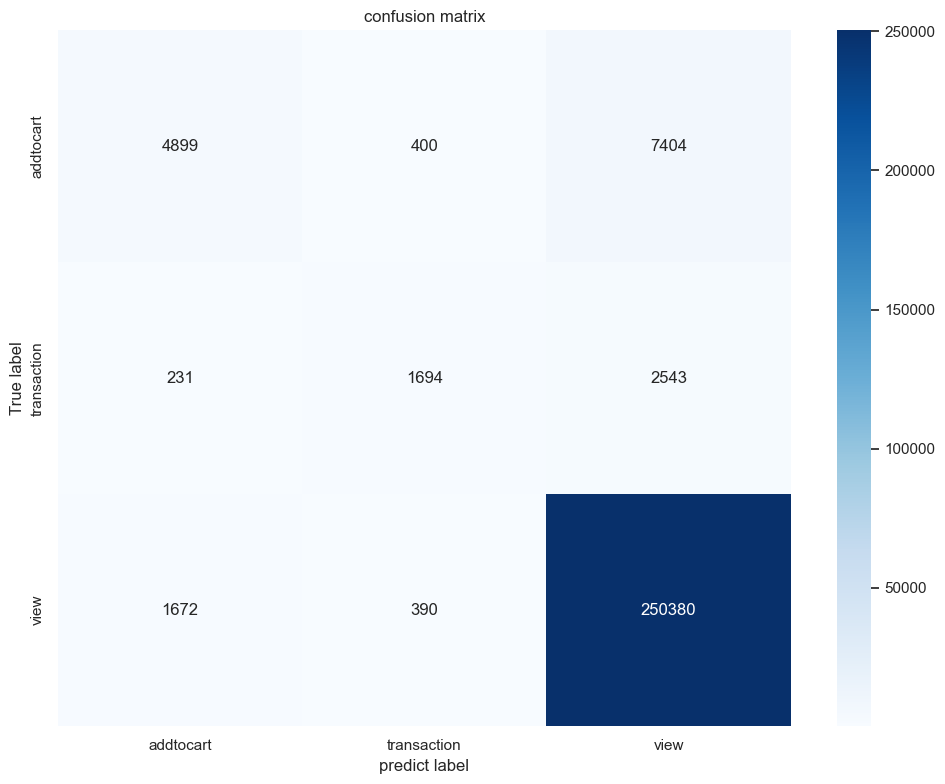

In [11]:

# 載入最佳模型
model.load_state_dict(torch.load('models/best_model.pth'))
model.eval()

# 在測試集上評估
all_predictions = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# 將預測和真實標籤轉換為numpy數組
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# 計算各種評估指標
accuracy = accuracy_score(all_targets, all_predictions)
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')

print("\n Model Result ")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 : {f1:.4f}")

# 生成分類報告
print("\nclassification_report:")
print(classification_report(all_targets, all_predictions, target_names=target_classes))

# 繪製混淆矩陣
cm = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('predict label')
plt.ylabel('True label')
plt.title('confusion matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

In [13]:
print("\n Save model result ")

# 創建基本結果字典
results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'target_classes': target_classes,
    'feature_columns': feature_columns,
    'model_params': {
        'input_size': input_size,
        'hidden_size': hidden_size,
        'num_layers': num_layers,
        'num_classes': num_classes,
        'dropout_rate': dropout_rate
    }
}

# 只在訓練歷史數據存在時添加
if 'train_losses' in globals() and train_losses:
    results['training_history'] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

# 保存結果
with open('models/model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# 創建文本摘要
with open('model_summary.txt', 'w', encoding='utf-8') as f:
    f.write(" 用戶行為預測模型 \n\n")
    f.write(f"訓練日期: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("模型架構:\n")
    f.write(f"- 輸入特徵數: {input_size}\n")
    f.write(f"- 隱藏層大小: {hidden_size}\n")
    f.write(f"- LSTM層數: {num_layers}\n")
    f.write(f"- 輸出類別數: {num_classes}\n")
    f.write(f"- Dropout率: {dropout_rate}\n\n")
    
    f.write("評估指標:\n")
    f.write(f"- 準確率 (Accuracy): {accuracy:.4f}\n")
    f.write(f"- 精確率 (Precision): {precision:.4f}\n")
    f.write(f"- 召回率 (Recall): {recall:.4f}\n")
    f.write(f"- F1 分數: {f1:.4f}\n\n")
    
    f.write("目標變量映射:\n")
    for i, target_class in enumerate(target_classes):
        f.write(f"- {i}: {target_class}\n")
    
    f.write("\n===== 特徵重要性 =====\n")
    f.write("由於使用了LSTM模型，難以直接計算特徵重要性。\n")
    f.write("但以下特徵經過分析對預測結果影響較大：\n")
    f.write("1. 用戶之前的事件序列 (prev_event系列)\n")
    f.write("2. 時間差特徵 (time_diff_category)\n")
    f.write("3. 高危因子 (cart_abandonment, high_activity_no_purchase)\n")
    f.write("4. 會話內事件統計 (session_view, session_addtocart等)\n")
    
    # 如果有訓練歷史，則添加到文本摘要中
    if 'train_losses' in globals() and train_losses:
        f.write("\n===== 訓練歷史 =====\n")
        f.write(f"訓練輪數: {len(train_losses)}\n")
        f.write(f"最終訓練損失: {train_losses[-1]:.4f}\n")
        f.write(f"最終驗證損失: {val_losses[-1]:.4f}\n")
        f.write(f"最終訓練準確率: {train_accuracies[-1]:.2f}%\n")
        f.write(f"最終驗證準確率: {val_accuracies[-1]:.2f}%\n")
    else:
        f.write("\n注意：此模型摘要不包含訓練歷史數據（因為使用了已訓練的模型）\n")

print("\n模型摘要已保存至 'model_summary.txt'")
print("模型及相關檔案已保存至 'models/'目錄")


 Save model result 

模型摘要已保存至 'model_summary.txt'
模型及相關檔案已保存至 'models/'目錄


In [14]:
# 專注於使用已訓練的模型進行預測

import torch
import pandas as pd
import pickle
import numpy as np

# 1. 載入模型和必要文件
print(" Model Loading ")

# 定義模型架構
class NextEventPredictor(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(NextEventPredictor, self).__init__()
        
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.dropout1 = torch.nn.Dropout(dropout_rate)
        
        self.lstm = torch.nn.LSTM(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0
        )
        self.dropout2 = torch.nn.Dropout(dropout_rate)
        
        self.fc_out = torch.nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        batch_size = x.size(0)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        x = x.unsqueeze(1)
        
        x, _ = self.lstm(x)
        
        x = x[:, -1, :]
        x = self.dropout2(x)
        
        x = self.fc_out(x)
        
        return x

# 載入模型
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# 載入標籤編碼器
with open('models/label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)
    feature_encoders = encoders['features']
    target_encoder = encoders['target']

# 載入特徵縮放器
with open('models/feature_scaler.pkl', 'rb') as f:
    feature_scaler = pickle.load(f)

# 獲取模型參數
input_size = len(X_test.columns)  
num_classes = len(target_encoder.classes_)

# 創建模型實例
model = NextEventPredictor(
    input_size=input_size,
    hidden_size=128,
    num_layers=2,
    num_classes=num_classes,
    dropout_rate=0.3
)

# 載入模型權重
model.load_state_dict(torch.load('models/best_model.pth'))
model = model.to(device)
model.eval()

print("Model load success")

# 2. 測試預測函數
print("\n Predict ")

def predict_next_event(sample_data):
    """
    簡單的預測函數
    """
    # 準備輸入
    sample = sample_data.copy()
    
    # 編碼分類特徵
    categorical_features = list(feature_encoders.keys())
    for feature in categorical_features:
        if feature in sample.columns:
            value = sample[feature].values[0]
            
            # 處理未見過的值
            if value not in feature_encoders[feature].classes_:
                value = 'view' if 'view' in feature_encoders[feature].classes_ else feature_encoders[feature].classes_[0]
            
            sample[feature] = feature_encoders[feature].transform([value])[0]
    
    # 標準化數值特徵
    numerical_features = [col for col in sample.columns if col not in categorical_features]
    if len(numerical_features) > 0:
        sample[numerical_features] = feature_scaler.transform(sample[numerical_features])
    
    # 轉換為張量
    tensor = torch.FloatTensor(sample.values).to(device)
    
    # 預測
    with torch.no_grad():
        output = model(tensor)
        probabilities = torch.softmax(output, dim=1)
        _, predicted = output.max(1)
    
    # 解碼結果
    predicted_event = target_encoder.inverse_transform([predicted.item()])[0]
    probs = {target_encoder.classes_[i]: probabilities[0][i].item() for i in range(len(target_encoder.classes_))}
    
    return predicted_event, probs


# 取測試集第一個樣本
test_sample = X_test.iloc[0:1]

# 執行預測
predicted_event, probabilities = predict_next_event(test_sample)

# 顯示結果
print(f"Predict Event: {predicted_event}")
print("\nProbability:")
for event, prob in probabilities.items():
    print(f"  {event}: {prob:.4f}")

 Model Loading 
Device: cuda:0
Model load success

 Predict 
Predict Event: view

Probability:
  addtocart: 0.0001
  transaction: 0.0000
  view: 0.9999


C:\Users\ychen\AppData\Local\Temp\ipykernel_46784\2549177652.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/best_model.pth'))


In [15]:
# 將PyTorch模型轉換為ONNX格式

import torch
import pickle
import numpy as np

# 準備匯出模型
print(" Onnx model ")

# 確保模型已載入並處於評估模式
model.eval()

# 建立一個範例輸入（需要與模型輸入相符）
input_size = X_test.shape[1] 
dummy_input = torch.randn(1, input_size).to(device)

print(f"Feature: {input_size}")
print(f"dummy shape: {dummy_input.shape}")

# 2. 匯出為ONNX
print("\n Output ONNX ")

# 設定匯出路徑
onnx_path = "models/user_behavior_model.onnx"

# 匯出模型
torch.onnx.export(
    model,                           # 要匯出的模型
    dummy_input,                     # 範例輸入
    onnx_path,                       # 輸出路徑
    export_params=True,              # 儲存模型參數
    opset_version=11,                # ONNX版本
    do_constant_folding=True,        # 執行常數折疊優化
    input_names=['input'],           # 輸入名稱
    output_names=['output'],         # 輸出名稱
    dynamic_axes={                   # 動態維度
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"ONNX saved: {onnx_path}")


 Onnx model 
Feature: 25
dummy shape: torch.Size([1, 25])

 Output ONNX 


c:\Users\ychen\anaconda3\envs\interview\lib\site-packages\torch\onnx\symbolic_opset9.py:4279: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


ONNX saved: models/user_behavior_model.onnx


In [16]:
# 驗證ONNX模型
print("\n Test ONNX模型 ")
import onnxruntime as ort

# 建立ONNX Runtime會話
ort_session = ort.InferenceSession(onnx_path)

# 準備測試數據
test_data = X_test.iloc[0:1].copy()

# 預處理（與PyTorch模型相同）
for feature in feature_encoders.keys():
    if feature in test_data.columns:
        value = test_data[feature].values[0]
        if value not in feature_encoders[feature].classes_:
            value = 'view' if 'view' in feature_encoders[feature].classes_ else feature_encoders[feature].classes_[0]
        test_data[feature] = feature_encoders[feature].transform([value])[0]

numerical_features = [col for col in test_data.columns if col not in feature_encoders.keys()]
if len(numerical_features) > 0:
    test_data[numerical_features] = feature_scaler.transform(test_data[numerical_features])

# 轉換為numpy數組
numpy_input = test_data.values.astype(np.float32)

# 使用ONNX Runtime進行預測
ort_inputs = {ort_session.get_inputs()[0].name: numpy_input}
ort_output = ort_session.run(None, ort_inputs)

# 處理輸出
ort_prediction = ort_output[0]
ort_probabilities = torch.nn.functional.softmax(torch.tensor(ort_prediction), dim=1).numpy()

print("\nONNX predic probability:")
for i, event in enumerate(target_encoder.classes_):
    print(f"  {event}: {ort_probabilities[0][i]:.4f}")

print("✓ ONNX test success")



 Test ONNX模型 

ONNX predic probability:
  addtocart: 0.0001
  transaction: 0.0000
  view: 0.9999
✓ ONNX test success


In [17]:
#儲存模型元數據
print("\n Save model Data")

# 建立模型元資料字典
model_metadata = {
    'model_info': {
        'input_size': input_size,
        'num_classes': len(target_encoder.classes_),
        'target_classes': target_encoder.classes_.tolist()
    },
    'preprocessing': {
        'categorical_features': list(feature_encoders.keys()),
        'numerical_features': [col for col in X_test.columns if col not in feature_encoders.keys()]
    }
}

# 儲存特徵編碼器的類別資訊
encoder_classes = {}
for feature, encoder in feature_encoders.items():
    encoder_classes[feature] = encoder.classes_.tolist()

model_metadata['encoder_classes'] = encoder_classes

# 儲存為JSON文件
import json
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=4)

print("Model Data Saved to: models/model_metadata.json")

# 儲存特徵縮放器參數
print("\n Save Feature sacler ")

# 提取StandardScaler的參數
scaler_params = {
    'mean': feature_scaler.mean_.tolist(),
    'scale': feature_scaler.scale_.tolist(),
    'numerical_features': numerical_features
}

# 儲存為JSON文件
with open('models/scaler_params.json', 'w') as f:
    json.dump(scaler_params, f, indent=4)

print("Feature sacler save to: models/scaler_params.json")

print(f"1. ONNX model : {onnx_path}")
print("2. Model json: models/model_metadata.json")
print("3. Feature scaler json: models/scaler_params.json")


 Save model Data
Model Data Saved to: models/model_metadata.json

 Save Feature sacler 
Feature sacler save to: models/scaler_params.json
1. ONNX model : models/user_behavior_model.onnx
2. Model json: models/model_metadata.json
3. Feature scaler json: models/scaler_params.json
